<a href="https://colab.research.google.com/github/nowkoai/nlplot0228/blob/main/nlplot0228.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ①Twitterで指定キーワードの検索結果を収集

In [1]:
import tweepy
import pandas as pd
import datetime

In [2]:
###########################################################
# TwitterのAPIキー
CONSUMER_KEY="CONSUMER_KEYを入力"
CONSUMER_SECRET="CONSUMER_SECRETを入力"
ACCESS_TOKEN="ACCESS_TOKENを入力"
ACCESS_SECRET="ACCESS_SECERETを入力"
###########################################################

In [3]:
# Twitter APIインスタンス作成
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
api = tweepy.API(auth, wait_on_rate_limit = True)

In [4]:
# Twitterの検索キーワード（リツィート、リプライを除く）
q = f"自民党 exclude:retweets -filter:replies"

In [5]:
# Tweetデータを格納するリスト
tweet_data = []

# Tweetデータの取得（ID/ユーザー名/★Tweerデータ/Text/いいね数/リツィート数）
for tweet in tweepy.Cursor(api.search, q=q, result_type='recent',locale="ja",lang="ja",include_entities=False,count=500).items(500):
    tweet_data.append([tweet.id_str,
                       tweet.user.screen_name,
                       tweet.created_at+datetime.timedelta(hours=9),
                       tweet.text.replace('\n',''),
                       tweet.favorite_count,
                       tweet.retweet_count])

In [6]:
# カラムを280文字幅に設定
pd.set_option("display.max_colwidth", 280)

In [7]:
# データ列名
columns_name=["TW_NO","USER_NAME","TW_TIME","TW_TEXT","FAV","RT"]
#データフレーム化
df=pd.DataFrame(tweet_data,columns=columns_name)

In [8]:
df

,TW_NO,USER_NAME,TW_TIME,TW_TEXT,FAV,RT
0,1498002996453855234,10centoq,2022-02-28 03:32:00,安倍も岸田も日本政府自民党は外国に外国人に日本人の血税渡すな https://t.co/uNoPir6e1E https://t.co/oa3va9QQ7V,0,0
1,1498002930058010625,waaldpeace5,2022-02-28 03:31:44,https://t.co/PQF7zohU43右翼自民党を含む右翼の独裁主義勢力が大規模な自然破壊につながる悪法を作るーー右翼の独裁勢力は原発政策も強行。愛国者を名乗る右翼の悪党どもが日本の未来を汚染します。「愛国心」という言葉は歴史的にいつもサギに使われます。,0,0
2,1498002856892600320,wellwellbeing1,2022-02-28 03:31:27,【拉致被害者を、おいしい-おいしいとしゃぶり尽くした安倍と自民党】下らん”青い拉致バッジ”を引きちぎり、くみ取り便所の豚うんこに投げつけようhttps://t.co/ieiCvwkAur,0,0
3,1498002044728135684,saitamashishish,2022-02-28 03:28:13,属会派名略称民進改革さいたま市議団民進改革自由民主党さいたま市議会議員団自由民主党公明党さいたま市議会議員団公明党日本共産党さいたま市議会議員団日本共産党自由民主党真政さいたま市議団自民党真政,0,0
4,1498001235156242434,inori_yasaka,2022-02-28 03:25:00,八方美人で矛盾だらけ。プーチンの核使用示唆を批判こそすれ、ここぞとばかりにメディア露出し核共有を提言。氏の権力が未だ大きい自民党、核禁条約に批准できないわけだ。&gt;同時に「被爆国として核を廃絶するという目標は掲げなければいけな… https://t.co/CG2ISvxiYi,0,0
...,...,...,...,...,...,...
495,1497931815520137216,ruri320ruri723,2022-02-27 22:49:09,プーチンをのさばらすな！自分が1番って言う思考の持ち主はイラン！何でも国民が言う事聞いて超パワハラやープーチン政権は終わりにしないとアカン！権力を奪わないとアカンって思ってる奴日本もいつまで経っても政権が自民党国… https://t.co/5obUJaKc1Z,0,0
496,1497931794926030852,sktm1996,2022-02-27 22:49:04,自民党・京都府連「マネロン疑惑」決定的証拠を入手《衆参2つの選挙収支ファイル》 #自民党京都府連 #文春オンライン https://t.co/6NMRnZ1BjG,1,0
497,1497931628110233601,jetskyou,2022-02-27 22:48:25,ゼレンスキー大統領の若くて体力がありそうで、目に力がある人がリーダーにふさわしいと改めて思った。国民や国の将来に興味が無く、金儲けと保身にしか興味が無い自民党のジジイ政権は早くくたばってほしい。 https://t.co/vALmrci8Vy,14,5
498,1497931408077393923,PayPayNews,2022-02-27 22:47:32,《実名・新証言》「選挙の金だと、もちろん認識していました」自民党京都府連マネロン買収疑惑(文春オンライン) https://t.co/OV3CUwliLb https://t.co/LHyrPqdMGL,0,0


## ② Twitterデータの前処理

In [9]:
!pip install emoji

     |████████████████████████████████| 174 kB 7.1 MB/s 
  Created wheel for emoji: filename=emoji-1.6.3-py3-none-any.whl size=170298 sha256=b25fdeeacbbee426a561e2b998e32b3f5e7a42e5f0ed0ef001aee2a28274cb57
  Stored in directory: /root/.cache/pip/wheels/03/8b/d7/ad579fbef83c287215c0caab60fb0ae0f30c4d7ce5f580eade
Successfully built emoji


In [10]:
# 絵文字を削除
import emoji

def remove_emoji(text):
    return emoji.get_emoji_regexp().sub(u'', text)


# ツイートを整形する（不要な文字を削除する！）
# 形態素解析する前に、必要に応じて追記
def format_df_text(text_col,df):
    df['temp'] = df[text_col].replace(r'https?://[w/:%#$&?()~.=+-…]+', '', regex=True) #画像へのリンクを削除
    df['temp'] = df['temp'].replace(r'@[w/:%#$&?()~.=+-…]+', '', regex=True) #'@'によるメンションを削除
    df['temp'] = df['temp'].replace(r'#(\w+)', '', regex=True) #ハッシュタグ(半角)を削除
    df['temp'] = df['temp'].replace(r'＃(\w+)', '', regex=True) #ハッシュタグ(全角)を削除
    df['temp'] = df['temp'].apply(lambda x: remove_emoji(x)) #🐶のような絵文字を削除
    
    return df['temp']

In [11]:
# Tweetデータの前処理
df['TW_TEXT_mod'] = format_df_text('TW_TEXT',df)

In [12]:
df

,TW_NO,USER_NAME,TW_TIME,TW_TEXT,FAV,RT,temp,TW_TEXT_mod
0,1498002996453855234,10centoq,2022-02-28 03:32:00,安倍も岸田も日本政府自民党は外国に外国人に日本人の血税渡すな https://t.co/uNoPir6e1E https://t.co/oa3va9QQ7V,0,0,安倍も岸田も日本政府自民党は外国に外国人に日本人の血税渡すな,安倍も岸田も日本政府自民党は外国に外国人に日本人の血税渡すな
1,1498002930058010625,waaldpeace5,2022-02-28 03:31:44,https://t.co/PQF7zohU43右翼自民党を含む右翼の独裁主義勢力が大規模な自然破壊につながる悪法を作るーー右翼の独裁勢力は原発政策も強行。愛国者を名乗る右翼の悪党どもが日本の未来を汚染します。「愛国心」という言葉は歴史的にいつもサギに使われます。,0,0,右翼自民党を含む右翼の独裁主義勢力が大規模な自然破壊につながる悪法を作るーー右翼の独裁勢力は原発政策も強行。愛国者を名乗る右翼の悪党どもが日本の未来を汚染します。「愛国心」という言葉は歴史的にいつもサギに使われます。,右翼自民党を含む右翼の独裁主義勢力が大規模な自然破壊につながる悪法を作るーー右翼の独裁勢力は原発政策も強行。愛国者を名乗る右翼の悪党どもが日本の未来を汚染します。「愛国心」という言葉は歴史的にいつもサギに使われます。
2,1498002856892600320,wellwellbeing1,2022-02-28 03:31:27,【拉致被害者を、おいしい-おいしいとしゃぶり尽くした安倍と自民党】下らん”青い拉致バッジ”を引きちぎり、くみ取り便所の豚うんこに投げつけようhttps://t.co/ieiCvwkAur,0,0,【拉致被害者を、おいしい-おいしいとしゃぶり尽くした安倍と自民党】下らん”青い拉致バッジ”を引きちぎり、くみ取り便所の豚うんこに投げつけよう,【拉致被害者を、おいしい-おいしいとしゃぶり尽くした安倍と自民党】下らん”青い拉致バッジ”を引きちぎり、くみ取り便所の豚うんこに投げつけよう
3,1498002044728135684,saitamashishish,2022-02-28 03:28:13,属会派名略称民進改革さいたま市議団民進改革自由民主党さいたま市議会議員団自由民主党公明党さいたま市議会議員団公明党日本共産党さいたま市議会議員団日本共産党自由民主党真政さいたま市議団自民党真政,0,0,属会派名略称民進改革さいたま市議団民進改革自由民主党さいたま市議会議員団自由民主党公明党さいたま市議会議員団公明党日本共産党さいたま市議会議員団日本共産党自由民主党真政さいたま市議団自民党真政,属会派名略称民進改革さいたま市議団民進改革自由民主党さいたま市議会議員団自由民主党公明党さいたま市議会議員団公明党日本共産党さいたま市議会議員団日本共産党自由民主党真政さいたま市議団自民党真政
4,1498001235156242434,inori_yasaka,2022-02-28 03:25:00,八方美人で矛盾だらけ。プーチンの核使用示唆を批判こそすれ、ここぞとばかりにメディア露出し核共有を提言。氏の権力が未だ大きい自民党、核禁条約に批准できないわけだ。&gt;同時に「被爆国として核を廃絶するという目標は掲げなければいけな… https://t.co/CG2ISvxiYi,0,0,八方美人で矛盾だらけ。プーチンの核使用示唆を批判こそすれ、ここぞとばかりにメディア露出し核共有を提言。氏の権力が未だ大きい自民党、核禁条約に批准できないわけだ。&gt;同時に「被爆国として核を廃絶するという目標は掲げなければいけな…,八方美人で矛盾だらけ。プーチンの核使用示唆を批判こそすれ、ここぞとばかりにメディア露出し核共有を提言。氏の権力が未だ大きい自民党、核禁条約に批准できないわけだ。&gt;同時に「被爆国として核を廃絶するという目標は掲げなければいけな…
...,...,...,...,...,...,...,...,...
495,1497931815520137216,ruri320ruri723,2022-02-27 22:49:09,プーチンをのさばらすな！自分が1番って言う思考の持ち主はイラン！何でも国民が言う事聞いて超パワハラやープーチン政権は終わりにしないとアカン！権力を奪わないとアカンって思ってる奴日本もいつまで経っても政権が自民党国… https://t.co/5obUJaKc1Z,0,0,プーチンをのさばらすな！自分が1番って言う思考の持ち主はイラン！何でも国民が言う事聞いて超パワハラやープーチン政権は終わりにしないとアカン！権力を奪わないとアカンって思ってる奴日本もいつまで経っても政権が自民党国…,プーチンをのさばらすな！自分が1番って言う思考の持ち主はイラン！何でも国民が言う事聞いて超パワハラやープーチン政権は終わりにしないとアカン！権力を奪わないとアカンって思ってる奴日本もいつまで経っても政権が自民党国…
496,1497931794926030852,sktm1996,2022-02-27 22:49:04,自民党・京都府連「マネロン疑惑」決定的証拠を入手《衆参2つの選挙収支ファイル》 #自民党京都府連 #文春オンライン https://t.co/6NMRnZ1BjG,1,0,自民党・京都府連「マネロン疑惑」決定的証拠を入手《衆参2つの選挙収支ファイル》,自民党・京都府連「マネロン疑惑」決定的証拠を入手《衆参2つの選挙収支ファイル》
497,1497931628110233601,jetskyou,2022-02-27 22:48:25,ゼレンスキー大統領の若くて体力がありそうで、目に力がある人がリーダーにふさわしいと改めて思った。国民や国の将来に興味が無く、金儲けと保身にしか興味が無い自民党のジジイ政権は早くくたばってほしい。 https://t.co/vALmrci8Vy,14,5,ゼレンスキー大統領の若くて体力がありそうで、目に力がある人がリーダーにふさわしいと改めて思った。国民や国の将来に興味が無く、金儲けと保身にしか興味が無い自民党のジジイ政権は早くくたばってほしい。,ゼレンスキー大統領の若くて体力がありそうで、目に力がある人がリーダーにふさわしいと改めて思った。国民や国の将来に興味が無く、金儲けと保身にしか興味が無い自民党のジジイ政権は早くくたばってほしい。
498,1497931408077393923,PayPayNews,2022-02-27 22:47:32,《実名・新証言》「選挙の金だと、もちろん認識していました」自民党京都府連マネロン買収疑惑(文春オンライン) https://t.co/OV3CUwliLb https://t.co/LHyrPqdMGL,0,0,《実名・新証言》「選挙の金だと、もちろん認識していました」自民党京都府連マネロン買収疑惑(文春オンライン),《実名・新証言》「選挙の金だと、もちろん認識していました」自民党京都府連マネロン買収疑惑(文春オンライン)


### ③ TwitterデータをGoogle Drive上に保存する

In [13]:
file_name='tw_all.csv'

# Twitter全情報をCSV保存
# df.to_csv(file_name,encoding='utf-8-sig',index=False)
df.to_csv(file_name,encoding='utf-8',index=False)

In [14]:
# ファイル保存じた現在パスを表示
%pwd

'/content'

In [15]:
# 保存ファイル名を確認 --> ★Googleドライブでファイルの中身をご確認ください！
%ls

sample_data/  tw_all.csv


In [18]:
!cat tw_all.csv

TW_NO,USER_NAME,TW_TIME,TW_TEXT,FAV,RT,temp,TW_TEXT_mod
1498002996453855234,10centoq,2022-02-28 03:32:00,安倍も岸田も日本政府自民党は外国に外国人に日本人の血税渡すな https://t.co/uNoPir6e1E https://t.co/oa3va9QQ7V,0,0,安倍も岸田も日本政府自民党は外国に外国人に日本人の血税渡すな  ,安倍も岸田も日本政府自民党は外国に外国人に日本人の血税渡すな  
1498002930058010625,waaldpeace5,2022-02-28 03:31:44,https://t.co/PQF7zohU43右翼自民党を含む右翼の独裁主義勢力が大規模な自然破壊につながる悪法を作るーー右翼の独裁勢力は原発政策も強行。愛国者を名乗る右翼の悪党どもが日本の未来を汚染します。「愛国心」という言葉は歴史的にいつもサギに使われます。,0,0,右翼自民党を含む右翼の独裁主義勢力が大規模な自然破壊につながる悪法を作るーー右翼の独裁勢力は原発政策も強行。愛国者を名乗る右翼の悪党どもが日本の未来を汚染します。「愛国心」という言葉は歴史的にいつもサギに使われます。,右翼自民党を含む右翼の独裁主義勢力が大規模な自然破壊につながる悪法を作るーー右翼の独裁勢力は原発政策も強行。愛国者を名乗る右翼の悪党どもが日本の未来を汚染します。「愛国心」という言葉は歴史的にいつもサギに使われます。
1498002856892600320,wellwellbeing1,2022-02-28 03:31:27,【拉致被害者を、おいしい-おいしいとしゃぶり尽くした安倍と自民党】下らん”青い拉致バッジ”を引きちぎり、くみ取り便所の豚うんこに投げつけようhttps://t.co/ieiCvwkAur,0,0,【拉致被害者を、おいしい-おいしいとしゃぶり尽くした安倍と自民党】下らん”青い拉致バッジ”を引きちぎり、くみ取り便所の豚うんこに投げつけよう,【拉致被害者を、おいしい-おいしいとしゃぶり尽くした安倍と自民党】下らん”青い拉致バッジ”を引きちぎり、くみ取り便所の豚うんこに投げつけよう
1498002044728135684,saitamashishish,2022-02-2

## ④ Twitterデータを形態素解析/Mecab

In [17]:
# 形態素分析ライブラリーMeCab と 辞書(mecab-ipadic-NEologd)のインストール 
!apt-get -q -y install sudo file mecab libmecab-dev mecab-ipadic-utf8 git curl python-mecab > /dev/null
!git clone --depth 1 https://github.com/neologd/mecab-ipadic-neologd.git > /dev/null 
!echo yes | mecab-ipadic-neologd/bin/install-mecab-ipadic-neologd -n > /dev/null 2>&1
!pip install mecab-python3 > /dev/null

# シンボリックリンクによるエラー回避
!ln -s /etc/mecabrc /usr/local/etc/mecabrc

Cloning into 'mecab-ipadic-neologd'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 75 (delta 5), reused 54 (delta 0), pack-reused 0
Unpacking objects: 100% (75/75), done.


In [19]:
# 辞書のパスの確認
!echo `mecab-config --dicdir`"/mecab-ipadic-neologd"

/usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd


In [20]:
import MeCab

# Mecabの動作確認（--> 形態素解析/分かち書き確認）
# Neologd新語辞書で、「鬼滅の刃」が認識されてる！
m = MeCab.Tagger('-d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd')
sample_txt = "鬼滅の刃をみながら、私はPythonでプログラミングをします"
print("Mecab:\n", m.parse(sample_txt))

Mecab:
 鬼滅の刃	名詞,固有名詞,一般,*,*,*,鬼滅の刃,キメツノヤイバ,キメツノヤイバ
を	助詞,格助詞,一般,*,*,*,を,ヲ,ヲ
み	動詞,自立,*,*,一段,連用形,みる,ミ,ミ
ながら	助詞,接続助詞,*,*,*,*,ながら,ナガラ,ナガラ
、	記号,読点,*,*,*,*,、,、,、
私	名詞,代名詞,一般,*,*,*,私,ワタシ,ワタシ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
Python	名詞,固有名詞,一般,*,*,*,Python,パイソン,パイソン
で	助詞,格助詞,一般,*,*,*,で,デ,デ
プログラミング	名詞,サ変接続,*,*,*,*,プログラミング,プログラミング,プログラミング
を	助詞,格助詞,一般,*,*,*,を,ヲ,ヲ
し	動詞,自立,*,*,サ変・スル,連用形,する,シ,シ
ます	助動詞,*,*,*,特殊・マス,基本形,ます,マス,マス
EOS



In [21]:
# 保存ファイル名を確認 --> ★Googleドライブでファイルの中身をご確認ください！
%ls

mecab-ipadic-neologd/  sample_data/  tw_all.csv


In [22]:
# CSVファイル読み込み（Twitterテキストデータを読み込み！）
df_tw = pd.read_csv("tw_all.csv")

In [23]:
# Pandasをリスト化
tw_data = df_tw['TW_TEXT_mod'].to_list()

In [24]:
# Mecabで形態素解析する文書の確認
# tw_data

In [25]:
# Mecabを使用して、形態素解析
# 形態素解析器: ChaSen、辞書: 新語対応で有名なNeologd
# mecab = MeCab.Tagger("-Ochasen")
mecab =MeCab.Tagger('-Ochasen -d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd')

In [26]:
# 文単位の名詞リスト
words_list=[]

# 文単位の名詞リストを生成
for sentence in tw_data:
    # print(mecab.parse(str(sentence)))
    # print(mecab.parse(str(sentence)).splitlines())

    sw_list = []
    for v in mecab.parse(str(sentence)).splitlines():
        # print(v)
        # print(v.split())
        if (len(v.split())>=3 and v.split()[3][:2]=='名詞'):
            sw_list.append(v.split()[2])
            # print(sw_list)
            
    words_list.append(sw_list)

In [27]:
# 形態素解析の結果として、取得した「文単位の名詞リスト」を確認
print(words_list)

[['安倍', '岸田', '日本政府', '自民党', '外国', '外国人', '日本人', '血税'], ['右翼', '自民党', '右翼', '独裁主義', '勢力', '大規模', '自然破壊', '悪法', 'ーー', '右翼', '独裁', '勢力', '原発政策', '強行', '愛国者', '右翼', '悪党', 'ども', '日本', '未来を', '汚染', '愛国心', '言葉', '歴史的', 'サギ'], ['拉致被害者', '安倍', '自民党', '拉致', 'バッジ', 'くみ取り', '便所', '豚', 'うんこ'], ['属', '会派', '名', '略称', '民進', '改革', 'さいたま', '市議', '団', '民進', '改革', '自由民主党', 'さいたま市議会', '議員団', '自由民主党', '公明党', 'さいたま市議会', '議員団', '公明党', '日本共産党', 'さいたま市議会', '議員団', '日本共産党', '自由民主党', '真政', 'さいたま', '市議', '団', '自民党', '真政'], ['八方美人', '矛盾', 'だらけ', 'プーチン', '核', '使用', '示唆', '批判', 'ここ', 'メディア', '露出', '核', '共有', '提言', '氏', '権力', '自民党', '核', '禁', '条約', '批准', 'わけ', 'GT', '被爆', '国', '核', '廃絶', '目標'], ['北海道', '田舎', '政治家', '維', '会', '政策', '正反対', 'キャリア', '自民党', '自分', '党', '新', '魂', '国会議員', '鈴木', '先生!', '悪口'], ['自民党', '200', 'X', '年', 'Y', '月', '民主党'], ['天皇制', '廃止', 'ネット', '実名', '投票', '直接民主主義', '明確', '共和', '制', '確立'], ['関係', '自民党', '与党', '憲法', '改正', '戦争', '国', 'しょう'], ['稲田朋美', 'さん', '誰', '曖昧', 'の', '自民党', 'かた', '国民', '支持', '政治

In [28]:
# 「文単位の名詞リスト」の平坦化
words_list_flat = []

for u in words_list:
    words_list_flat.extend(u)

In [29]:
print(words_list_flat)

['安倍', '岸田', '日本政府', '自民党', '外国', '外国人', '日本人', '血税', '右翼', '自民党', '右翼', '独裁主義', '勢力', '大規模', '自然破壊', '悪法', 'ーー', '右翼', '独裁', '勢力', '原発政策', '強行', '愛国者', '右翼', '悪党', 'ども', '日本', '未来を', '汚染', '愛国心', '言葉', '歴史的', 'サギ', '拉致被害者', '安倍', '自民党', '拉致', 'バッジ', 'くみ取り', '便所', '豚', 'うんこ', '属', '会派', '名', '略称', '民進', '改革', 'さいたま', '市議', '団', '民進', '改革', '自由民主党', 'さいたま市議会', '議員団', '自由民主党', '公明党', 'さいたま市議会', '議員団', '公明党', '日本共産党', 'さいたま市議会', '議員団', '日本共産党', '自由民主党', '真政', 'さいたま', '市議', '団', '自民党', '真政', '八方美人', '矛盾', 'だらけ', 'プーチン', '核', '使用', '示唆', '批判', 'ここ', 'メディア', '露出', '核', '共有', '提言', '氏', '権力', '自民党', '核', '禁', '条約', '批准', 'わけ', 'GT', '被爆', '国', '核', '廃絶', '目標', '北海道', '田舎', '政治家', '維', '会', '政策', '正反対', 'キャリア', '自民党', '自分', '党', '新', '魂', '国会議員', '鈴木', '先生!', '悪口', '自民党', '200', 'X', '年', 'Y', '月', '民主党', '天皇制', '廃止', 'ネット', '実名', '投票', '直接民主主義', '明確', '共和', '制', '確立', '関係', '自民党', '与党', '憲法', '改正', '戦争', '国', 'しょう', '稲田朋美', 'さん', '誰', '曖昧', 'の', '自民党', 'かた', '国民', '支持', '政治', '必要', 'よう', '発言'

### ⑤ ワードクラウドの表示

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [31]:
# ワードのリストをスペース区切りで連結
words_text = " ".join(words_list_flat)
words_text

'安倍 岸田 日本政府 自民党 外国 外国人 日本人 血税 右翼 自民党 右翼 独裁主義 勢力 大規模 自然破壊 悪法 ーー 右翼 独裁 勢力 原発政策 強行 愛国者 右翼 悪党 ども 日本 未来を 汚染 愛国心 言葉 歴史的 サギ 拉致被害者 安倍 自民党 拉致 バッジ くみ取り 便所 豚 うんこ 属 会派 名 略称 民進 改革 さいたま 市議 団 民進 改革 自由民主党 さいたま市議会 議員団 自由民主党 公明党 さいたま市議会 議員団 公明党 日本共産党 さいたま市議会 議員団 日本共産党 自由民主党 真政 さいたま 市議 団 自民党 真政 八方美人 矛盾 だらけ プーチン 核 使用 示唆 批判 ここ メディア 露出 核 共有 提言 氏 権力 自民党 核 禁 条約 批准 わけ GT 被爆 国 核 廃絶 目標 北海道 田舎 政治家 維 会 政策 正反対 キャリア 自民党 自分 党 新 魂 国会議員 鈴木 先生! 悪口 自民党 200 X 年 Y 月 民主党 天皇制 廃止 ネット 実名 投票 直接民主主義 明確 共和 制 確立 関係 自民党 与党 憲法 改正 戦争 国 しょう 稲田朋美 さん 誰 曖昧 の 自民党 かた 国民 支持 政治 必要 よう 発言 わたし 感銘 ん 与党 これ 政治家 一般人 違い 結果 責任 政治 人間 発言 自民党 改憲 案 現行憲法 前文 侵略戦争 反省 平和的生存権 削除 ９ 条 ２ 項 削除 憲法草案 内容 維持 うえ ９ 条 全面 的 改定 自国 自国 ため 自民党 腐敗 国 戦争 段階 国力 増強 右翼 安倍 一派 税金 ドロボー 達 国費 現状 改善 そう こと 小野寺 さん 自民党 投票 バカ ども 自民党 数々 汚職 日本 こと そう 私 特定秘密保護法 賛成 自民党 衆院議員 当選 石田 真敏 いしだ まさとし 和歌山 2 二階 俊博 かい ひろ 和歌山 3 泥沼 化 一途 市民 大量死 現代 戦争 今世紀 何回 目 の こと の 平和主義 外交 努力 放棄 戦争 自民党 体制翼賛 野党 恐怖 これ 社民党 機関紙 ウクライナ 危機 ロシア 支持 記事 削除 戦争 日 記事 一時的 復活 JSF 百田尚樹 歴史 本 自民党政治 家 それ 通り 世界線 ロシア プロパガンダ ブーメラン 3時 94年 政治 制度 手 小沢

In [32]:
# 日本語の True Font のインストール
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 39 not upgraded.
Need to get 8,251 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-gothic all 00303-18ubuntu1 [3,526 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-mincho all 00303-18ubuntu1 [4,725 kB]
Fetched 8,251 kB in 0s (27.0 MB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 155538 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-go

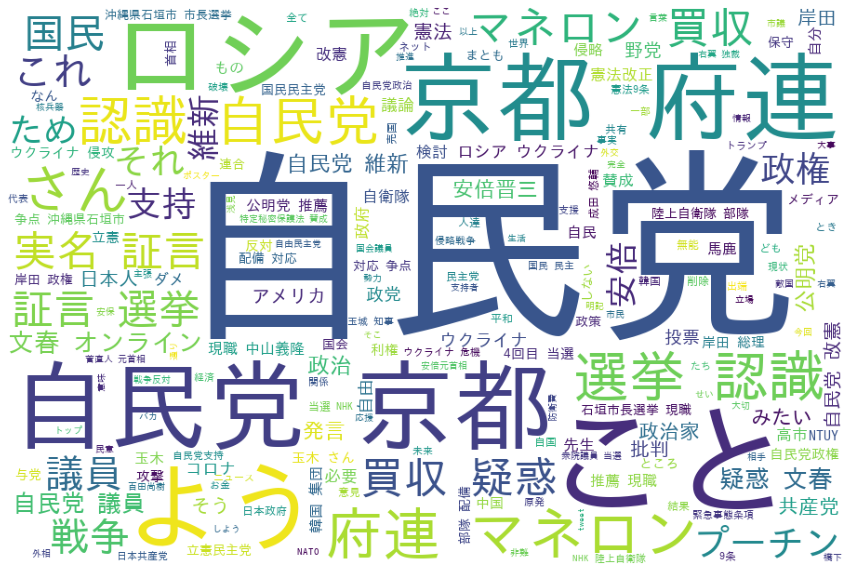

In [33]:
# WordCloudで出力するフォントを指定
font_path = "/usr/share/fonts/truetype/fonts-japanese-gothic.ttf"

# ストップワードの設定　※これは検索キーワードによって除外したほうがいい単語を設定
stop_words = [ 'https','OracleInnovation' ,'Innovation','Oracle','co','the','of','Summit','Tokyo','Japan','RT',u'説明',u'データ',u'する',u'オラクル',u'日本',u'提供',u'開催',u'お客様']

#解析単語の指定、ストップワードの設定、背景色は白
wordcloud = WordCloud(background_color="white", font_path=font_path, stopwords=set(stop_words),width=900,height=600).generate(words_text)

# ワードクラウドを表示
plt.figure(figsize=(15,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### ⑥ ワードカウント（★ストップワードのチェック）

In [34]:
from collections import Counter

In [35]:
# Counterの引数はリストを指定！
print(words_list_flat)

['安倍', '岸田', '日本政府', '自民党', '外国', '外国人', '日本人', '血税', '右翼', '自民党', '右翼', '独裁主義', '勢力', '大規模', '自然破壊', '悪法', 'ーー', '右翼', '独裁', '勢力', '原発政策', '強行', '愛国者', '右翼', '悪党', 'ども', '日本', '未来を', '汚染', '愛国心', '言葉', '歴史的', 'サギ', '拉致被害者', '安倍', '自民党', '拉致', 'バッジ', 'くみ取り', '便所', '豚', 'うんこ', '属', '会派', '名', '略称', '民進', '改革', 'さいたま', '市議', '団', '民進', '改革', '自由民主党', 'さいたま市議会', '議員団', '自由民主党', '公明党', 'さいたま市議会', '議員団', '公明党', '日本共産党', 'さいたま市議会', '議員団', '日本共産党', '自由民主党', '真政', 'さいたま', '市議', '団', '自民党', '真政', '八方美人', '矛盾', 'だらけ', 'プーチン', '核', '使用', '示唆', '批判', 'ここ', 'メディア', '露出', '核', '共有', '提言', '氏', '権力', '自民党', '核', '禁', '条約', '批准', 'わけ', 'GT', '被爆', '国', '核', '廃絶', '目標', '北海道', '田舎', '政治家', '維', '会', '政策', '正反対', 'キャリア', '自民党', '自分', '党', '新', '魂', '国会議員', '鈴木', '先生!', '悪口', '自民党', '200', 'X', '年', 'Y', '月', '民主党', '天皇制', '廃止', 'ネット', '実名', '投票', '直接民主主義', '明確', '共和', '制', '確立', '関係', '自民党', '与党', '憲法', '改正', '戦争', '国', 'しょう', '稲田朋美', 'さん', '誰', '曖昧', 'の', '自民党', 'かた', '国民', '支持', '政治', '必要', 'よう', '発言'

In [36]:
# 各ワードの出現カウントの数値出力(カンマ区切り)
counter = Counter(words_list_flat)
print(counter)

Counter({'自民党': 463, 'の': 136, '日本': 102, 'こと': 70, 'ん': 68, 'ロシア': 56, '選挙': 54, 'さん': 53, '議員': 50, 'ウクライナ': 48, '金': 45, '維新': 41, '京都': 41, 'よう': 40, '府連': 40, 'マネロン': 40, '疑惑': 40, '氏': 38, '国民': 38, '認識': 38, '実名': 37, '買収': 37, '事': 36, '人': 35, '証言': 35, '政権': 33, '岸田': 32, '戦争': 31, 'これ': 31, '今': 31, '公明党': 29, 'プーチン': 27, '改憲': 26, 'それ': 26, '何': 26, '支持': 25, '批判': 24, '国': 24, 'ため': 24, 'オンライン': 24, '安倍': 23, '政治家': 22, '当選': 22, '文春': 22, '核': 21, '賛成': 20, '現職': 20, '憲法': 19, '玉木': 19, '方': 19, '政治': 18, '発言': 17, '安倍晋三': 17, '者': 17, '韓国': 17, '自分': 16, '投票': 16, 'みたい': 16, '共産党': 16, '日本人': 15, 'そう': 15, '私': 15, '総理': 15, '野党': 14, 'アメリカ': 14, '推薦': 14, '配備': 14, '右翼': 13, '２': 13, '的': 13, '中': 13, '政党': 13, '侵攻': 13, '対応': 13, '時': 13, '自由': 13, '必要': 12, 'コロナ': 12, '維新の会': 12, '問題': 12, '議論': 12, '政府': 12, '集団': 12, '改正': 11, '案': 11, '目': 11, '憲法改正': 11, '１': 11, '高市': 11, 'ら': 11, '自衛隊': 11, '票': 11, '検討': 11, '為': 11, '中山義隆': 11, 'NHK': 11, 'ダメ': 11, '争点': 11, '

In [37]:
# 数値を降順にして、ワードの上位ランキングを数値でもみてみる
print(sorted(counter.items(), key=lambda x:x[1], reverse=True))

[('自民党', 463), ('の', 136), ('日本', 102), ('こと', 70), ('ん', 68), ('ロシア', 56), ('選挙', 54), ('さん', 53), ('議員', 50), ('ウクライナ', 48), ('金', 45), ('維新', 41), ('京都', 41), ('よう', 40), ('府連', 40), ('マネロン', 40), ('疑惑', 40), ('氏', 38), ('国民', 38), ('認識', 38), ('実名', 37), ('買収', 37), ('事', 36), ('人', 35), ('証言', 35), ('政権', 33), ('岸田', 32), ('戦争', 31), ('これ', 31), ('今', 31), ('公明党', 29), ('プーチン', 27), ('改憲', 26), ('それ', 26), ('何', 26), ('支持', 25), ('批判', 24), ('国', 24), ('ため', 24), ('オンライン', 24), ('安倍', 23), ('政治家', 22), ('当選', 22), ('文春', 22), ('核', 21), ('賛成', 20), ('現職', 20), ('憲法', 19), ('玉木', 19), ('方', 19), ('政治', 18), ('発言', 17), ('安倍晋三', 17), ('者', 17), ('韓国', 17), ('自分', 16), ('投票', 16), ('みたい', 16), ('共産党', 16), ('日本人', 15), ('そう', 15), ('私', 15), ('総理', 15), ('野党', 14), ('アメリカ', 14), ('推薦', 14), ('配備', 14), ('右翼', 13), ('２', 13), ('的', 13), ('中', 13), ('政党', 13), ('侵攻', 13), ('対応', 13), ('時', 13), ('自由', 13), ('必要', 12), ('コロナ', 12), ('維新の会', 12), ('問題', 12), ('議論', 12), ('政府', 12), ('集団'

In [38]:
# 適さない単語をリストからカット（NGワードの駆逐）
words_list_flat2 = []
for w in words_list_flat:
    if w not in ['の', 'こと', 'ん', 'これ', 'さん', 'よう', '方', '今', '者', '何', 'ため', '氏', 'それ', '時', '的', 'もの', '中', '為', '内', 'みたい', 'そう', '１', '2', '3', '4', '5', '6', '7', '8', '9', '0', 'ら', '等', 'たち', 'さ', 'そこ']:
        words_list_flat2.append(w)

In [39]:
# 各ワードの出現カウントの数値出力(カンマ区切り)
#--> NGワードの駆逐後
counter2 = Counter(words_list_flat2)
print(sorted(counter2.items(), key=lambda x:x[1], reverse=True))

[('自民党', 463), ('日本', 102), ('ロシア', 56), ('選挙', 54), ('議員', 50), ('ウクライナ', 48), ('金', 45), ('維新', 41), ('京都', 41), ('府連', 40), ('マネロン', 40), ('疑惑', 40), ('国民', 38), ('認識', 38), ('実名', 37), ('買収', 37), ('事', 36), ('人', 35), ('証言', 35), ('政権', 33), ('岸田', 32), ('戦争', 31), ('公明党', 29), ('プーチン', 27), ('改憲', 26), ('支持', 25), ('批判', 24), ('国', 24), ('オンライン', 24), ('安倍', 23), ('政治家', 22), ('当選', 22), ('文春', 22), ('核', 21), ('賛成', 20), ('現職', 20), ('憲法', 19), ('玉木', 19), ('政治', 18), ('発言', 17), ('安倍晋三', 17), ('韓国', 17), ('自分', 16), ('投票', 16), ('共産党', 16), ('日本人', 15), ('私', 15), ('総理', 15), ('野党', 14), ('アメリカ', 14), ('推薦', 14), ('配備', 14), ('右翼', 13), ('２', 13), ('政党', 13), ('侵攻', 13), ('対応', 13), ('自由', 13), ('必要', 12), ('コロナ', 12), ('維新の会', 12), ('問題', 12), ('議論', 12), ('政府', 12), ('集団', 12), ('改正', 11), ('案', 11), ('目', 11), ('憲法改正', 11), ('高市', 11), ('自衛隊', 11), ('票', 11), ('検討', 11), ('中山義隆', 11), ('NHK', 11), ('ダメ', 11), ('争点', 11), ('誰', 10), ('本', 10), ('先生', 10), ('馬鹿', 10), ('侵略', 1

In [40]:
# ワードのリストをスペース区切りで連結
words_text2 = " ".join(words_list_flat2)
words_text2

'安倍 岸田 日本政府 自民党 外国 外国人 日本人 血税 右翼 自民党 右翼 独裁主義 勢力 大規模 自然破壊 悪法 ーー 右翼 独裁 勢力 原発政策 強行 愛国者 右翼 悪党 ども 日本 未来を 汚染 愛国心 言葉 歴史的 サギ 拉致被害者 安倍 自民党 拉致 バッジ くみ取り 便所 豚 うんこ 属 会派 名 略称 民進 改革 さいたま 市議 団 民進 改革 自由民主党 さいたま市議会 議員団 自由民主党 公明党 さいたま市議会 議員団 公明党 日本共産党 さいたま市議会 議員団 日本共産党 自由民主党 真政 さいたま 市議 団 自民党 真政 八方美人 矛盾 だらけ プーチン 核 使用 示唆 批判 ここ メディア 露出 核 共有 提言 権力 自民党 核 禁 条約 批准 わけ GT 被爆 国 核 廃絶 目標 北海道 田舎 政治家 維 会 政策 正反対 キャリア 自民党 自分 党 新 魂 国会議員 鈴木 先生! 悪口 自民党 200 X 年 Y 月 民主党 天皇制 廃止 ネット 実名 投票 直接民主主義 明確 共和 制 確立 関係 自民党 与党 憲法 改正 戦争 国 しょう 稲田朋美 誰 曖昧 自民党 かた 国民 支持 政治 必要 発言 わたし 感銘 与党 政治家 一般人 違い 結果 責任 政治 人間 発言 自民党 改憲 案 現行憲法 前文 侵略戦争 反省 平和的生存権 削除 ９ 条 ２ 項 削除 憲法草案 内容 維持 うえ ９ 条 全面 改定 自国 自国 自民党 腐敗 国 戦争 段階 国力 増強 右翼 安倍 一派 税金 ドロボー 達 国費 現状 改善 小野寺 自民党 投票 バカ ども 自民党 数々 汚職 日本 私 特定秘密保護法 賛成 自民党 衆院議員 当選 石田 真敏 いしだ まさとし 和歌山 二階 俊博 かい ひろ 和歌山 泥沼 化 一途 市民 大量死 現代 戦争 今世紀 何回 目 平和主義 外交 努力 放棄 戦争 自民党 体制翼賛 野党 恐怖 社民党 機関紙 ウクライナ 危機 ロシア 支持 記事 削除 戦争 日 記事 一時的 復活 JSF 百田尚樹 歴史 本 自民党政治 家 通り 世界線 ロシア プロパガンダ ブーメラン 3時 94年 政治 制度 手 小沢一郎 河野洋平 諸悪の根源 自民党 保守派 追放 小泉純一郎 安倍 流れ 国 破壊 幅跳 びのようだあと

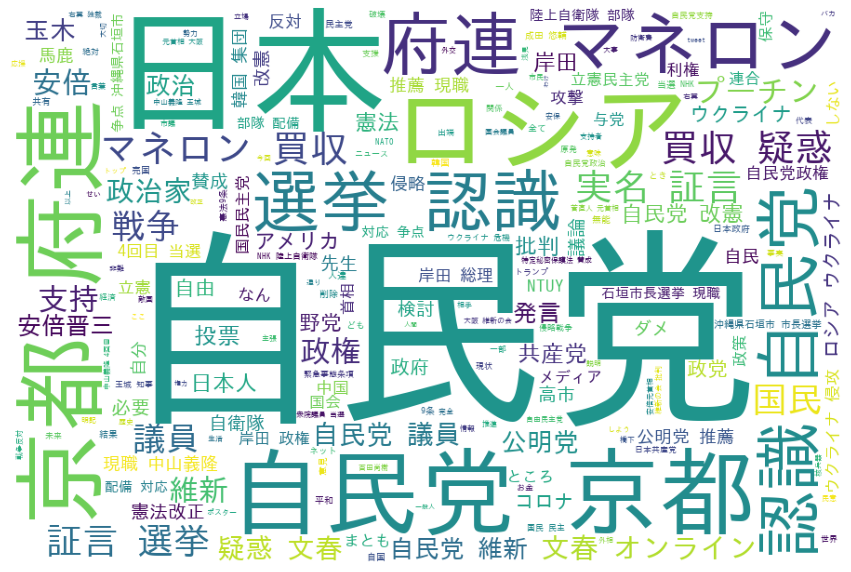

In [41]:
#--> NGワードの駆逐後のワードクラウド
#----> ワードクラウドの表示内容よくなるはず！

# WordCloudで出力するフォントを指定
font_path = "/usr/share/fonts/truetype/fonts-japanese-gothic.ttf"

# ストップワードの設定　※これは検索キーワードによって除外したほうがいい単語を設定
stop_words = [ 'みたい','もの' ,'こと','なのか','あれ', 'あ', 'とか']

#解析単語の指定、ストップワードの設定、背景色は白
wordcloud = WordCloud(background_color="white", font_path=font_path, stopwords=set(stop_words),width=900,height=600).generate(words_text2)

# ワードクラウドを表示
plt.figure(figsize=(15,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# ④ nlplotで、共起ネットワーク

In [42]:
# 保存ファイル名を確認 --> ★Googleドライブでファイルの中身をご確認ください！
%ls

mecab-ipadic-neologd/  sample_data/  tw_all.csv


In [43]:
# CSVファイル読み込み（Twitterテキストデータを読み込み！）
df_npt = pd.read_csv('tw_all.csv')

In [44]:
df_npt2 = df.drop(["TW_NO", "USER_NAME", "TW_TIME", "FAV", "RT", "temp", "TW_TEXT"], axis=1)

In [45]:
# df_npt2

In [46]:
# Pandasをリスト化
npt_data = df_npt2['TW_TEXT_mod'].to_list()

In [47]:
# npt_data

In [48]:
# Mecabを使用して、形態素解析
# 形態素解析器: ChaSen、辞書: 新語対応で有名なNeologd
# mecab = MeCab.Tagger("-Ochasen")
mecab =MeCab.Tagger('-Ochasen -d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd')

In [49]:
# 文単位の名詞リスト
npt_words_list=[]

# 文単位の名詞リストを生成
for sentence in npt_data:
    # print(mecab.parse(str(sentence)))
    # print(mecab.parse(str(sentence)).splitlines())

    sw_list = []
    for v in mecab.parse(str(sentence)).splitlines():
        # print(v)
        # print(v.split())
        if (len(v.split())>=3 and v.split()[3][:2]=='名詞'):
            sw_list.append(v.split()[2])
            # print(sw_list)
            
    npt_words_list.append(sw_list)

In [50]:
print(npt_words_list)

[['安倍', '岸田', '日本政府', '自民党', '外国', '外国人', '日本人', '血税'], ['右翼', '自民党', '右翼', '独裁主義', '勢力', '大規模', '自然破壊', '悪法', 'ーー', '右翼', '独裁', '勢力', '原発政策', '強行', '愛国者', '右翼', '悪党', 'ども', '日本', '未来を', '汚染', '愛国心', '言葉', '歴史的', 'サギ'], ['拉致被害者', '安倍', '自民党', '拉致', 'バッジ', 'くみ取り', '便所', '豚', 'うんこ'], ['属', '会派', '名', '略称', '民進', '改革', 'さいたま', '市議', '団', '民進', '改革', '自由民主党', 'さいたま市議会', '議員団', '自由民主党', '公明党', 'さいたま市議会', '議員団', '公明党', '日本共産党', 'さいたま市議会', '議員団', '日本共産党', '自由民主党', '真政', 'さいたま', '市議', '団', '自民党', '真政'], ['八方美人', '矛盾', 'だらけ', 'プーチン', '核', '使用', '示唆', '批判', 'ここ', 'メディア', '露出', '核', '共有', '提言', '氏', '権力', '自民党', '核', '禁', '条約', '批准', 'わけ', 'GT', '被爆', '国', '核', '廃絶', '目標'], ['北海道', '田舎', '政治家', '維', '会', '政策', '正反対', 'キャリア', '自民党', '自分', '党', '新', '魂', '国会議員', '鈴木', '先生!', '悪口'], ['自民党', '200', 'X', '年', 'Y', '月', '民主党'], ['天皇制', '廃止', 'ネット', '実名', '投票', '直接民主主義', '明確', '共和', '制', '確立'], ['関係', '自民党', '与党', '憲法', '改正', '戦争', '国', 'しょう'], ['稲田朋美', 'さん', '誰', '曖昧', 'の', '自民党', 'かた', '国民', '支持', '政治

In [51]:
# 適さない単語をリストからカット（★NGワードの駆逐）
npt_words_list2 = []

for l in npt_words_list:
    # print(l)

    w_list = []
    for w in l:
        if w not in ['事', '感じ', 'うた', 'の', 'こと', 'ん', 'これ', 'さん', 'よう', '方', '今', '者', '何', 'ため', '氏', 'それ', '時', '的', 'もの', '中', '為', '内', 'みたい', 'そう', '１', '2', '3', '4', '5', '6', '7', '8', '9', '0', '１', '２', '３', '４', '５', '６', '７', '８', '９', '０', 'ら', '等', 'たち', 'さ', 'そこ']:
            w_list .append(w)
        # print(w_list)
    
    npt_words_list2.append(w_list)

In [52]:
print(npt_words_list2)

[['安倍', '岸田', '日本政府', '自民党', '外国', '外国人', '日本人', '血税'], ['右翼', '自民党', '右翼', '独裁主義', '勢力', '大規模', '自然破壊', '悪法', 'ーー', '右翼', '独裁', '勢力', '原発政策', '強行', '愛国者', '右翼', '悪党', 'ども', '日本', '未来を', '汚染', '愛国心', '言葉', '歴史的', 'サギ'], ['拉致被害者', '安倍', '自民党', '拉致', 'バッジ', 'くみ取り', '便所', '豚', 'うんこ'], ['属', '会派', '名', '略称', '民進', '改革', 'さいたま', '市議', '団', '民進', '改革', '自由民主党', 'さいたま市議会', '議員団', '自由民主党', '公明党', 'さいたま市議会', '議員団', '公明党', '日本共産党', 'さいたま市議会', '議員団', '日本共産党', '自由民主党', '真政', 'さいたま', '市議', '団', '自民党', '真政'], ['八方美人', '矛盾', 'だらけ', 'プーチン', '核', '使用', '示唆', '批判', 'ここ', 'メディア', '露出', '核', '共有', '提言', '権力', '自民党', '核', '禁', '条約', '批准', 'わけ', 'GT', '被爆', '国', '核', '廃絶', '目標'], ['北海道', '田舎', '政治家', '維', '会', '政策', '正反対', 'キャリア', '自民党', '自分', '党', '新', '魂', '国会議員', '鈴木', '先生!', '悪口'], ['自民党', '200', 'X', '年', 'Y', '月', '民主党'], ['天皇制', '廃止', 'ネット', '実名', '投票', '直接民主主義', '明確', '共和', '制', '確立'], ['関係', '自民党', '与党', '憲法', '改正', '戦争', '国', 'しょう'], ['稲田朋美', '誰', '曖昧', '自民党', 'かた', '国民', '支持', '政治', '必要', '発言', '

In [53]:
#形態素結果のリスト化＆ストップワードをカットして、データフレームdf_npt2に結果を列追加する
df_npt2['words'] = npt_words_list2

In [54]:
df_npt2

,TW_TEXT_mod,words
0,安倍も岸田も日本政府自民党は外国に外国人に日本人の血税渡すな,"[安倍, 岸田, 日本政府, 自民党, 外国, 外国人, 日本人, 血税]"
1,右翼自民党を含む右翼の独裁主義勢力が大規模な自然破壊につながる悪法を作るーー右翼の独裁勢力は原発政策も強行。愛国者を名乗る右翼の悪党どもが日本の未来を汚染します。「愛国心」という言葉は歴史的にいつもサギに使われます。,"[右翼, 自民党, 右翼, 独裁主義, 勢力, 大規模, 自然破壊, 悪法, ーー, 右翼, 独裁, 勢力, 原発政策, 強行, 愛国者, 右翼, 悪党, ども, 日本, 未来を, 汚染, 愛国心, 言葉, 歴史的, サギ]"
2,【拉致被害者を、おいしい-おいしいとしゃぶり尽くした安倍と自民党】下らん”青い拉致バッジ”を引きちぎり、くみ取り便所の豚うんこに投げつけよう,"[拉致被害者, 安倍, 自民党, 拉致, バッジ, くみ取り, 便所, 豚, うんこ]"
3,属会派名略称民進改革さいたま市議団民進改革自由民主党さいたま市議会議員団自由民主党公明党さいたま市議会議員団公明党日本共産党さいたま市議会議員団日本共産党自由民主党真政さいたま市議団自民党真政,"[属, 会派, 名, 略称, 民進, 改革, さいたま, 市議, 団, 民進, 改革, 自由民主党, さいたま市議会, 議員団, 自由民主党, 公明党, さいたま市議会, 議員団, 公明党, 日本共産党, さいたま市議会, 議員団, 日本共産党, 自由民主党, 真政, さいたま, 市議, 団, 自民党, 真政]"
4,八方美人で矛盾だらけ。プーチンの核使用示唆を批判こそすれ、ここぞとばかりにメディア露出し核共有を提言。氏の権力が未だ大きい自民党、核禁条約に批准できないわけだ。&gt;同時に「被爆国として核を廃絶するという目標は掲げなければいけな…,"[八方美人, 矛盾, だらけ, プーチン, 核, 使用, 示唆, 批判, ここ, メディア, 露出, 核, 共有, 提言, 権力, 自民党, 核, 禁, 条約, 批准, わけ, GT, 被爆, 国, 核, 廃絶, 目標]"
...,...,...
495,プーチンをのさばらすな！自分が1番って言う思考の持ち主はイラン！何でも国民が言う事聞いて超パワハラやープーチン政権は終わりにしないとアカン！権力を奪わないとアカンって思ってる奴日本もいつまで経っても政権が自民党国…,"[プーチン, な!, 自分, 1番, 思考, 持ち主, イラン, 国民, パワハラ, ープーチン, 政権, しない, アカン, 権力, アカン, 奴, 日本, いつ, 政権, 自民党, 国]"
496,自民党・京都府連「マネロン疑惑」決定的証拠を入手《衆参2つの選挙収支ファイル》,"[自民党, 京都, 府連, マネロン, 疑惑, 決定的, 証拠, 入手, 衆参, 2つ, 選挙, 収支, ファイル]"
497,ゼレンスキー大統領の若くて体力がありそうで、目に力がある人がリーダーにふさわしいと改めて思った。国民や国の将来に興味が無く、金儲けと保身にしか興味が無い自民党のジジイ政権は早くくたばってほしい。,"[ゼレンスキー, 大統領, 体力, 目, 力, 人, リーダー, 国民, 国, 将来, 興味, 金儲け, 保身, 興味, 自民党, ジジイ, 政権]"
498,《実名・新証言》「選挙の金だと、もちろん認識していました」自民党京都府連マネロン買収疑惑(文春オンライン),"[実名, 証言, 選挙, 金, 認識, 自民党, 京都, 府連, マネロン, 買収, 疑惑, 文春, オンライン]"


In [55]:
# nlplotのインストール
!pip install nlplot

     |████████████████████████████████| 967 kB 11.9 MB/s 


In [56]:
import nlplot

In [57]:
# nlplotのインスタンスを生成
npt = nlplot.NLPlot(df_npt2, target_col='words')

In [58]:
# ストップワードの計算
# top_nで頻出上位単語, min_freqで頻出下位単語を指定できる
# 今回は上位2単語（XXX・YYY）をストップワードに指定
# stopwords = npt.get_stopword(top_n=2, min_freq=0)

# 初回は、ストップワーズは設定なし（チャートをチェックして追加する方針）
stopwords = npt.get_stopword(top_n=0, min_freq=0)

## N-gram bar chart

In [59]:
# ngramの引数に与える数値により、いくつ隣り合わせの単語までを考慮するかを指定できる
npt.bar_ngram(
    title='uni-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=1,  #1の場合
    top_n=50,
    stopwords=stopwords,
)

100%|██████████| 500/500 [00:00<00:00, 39644.45it/s]


## co-occurrence networks（共起ネットワーク）

- このネットワークを描画する場合は、事前にビルド処理が必要
- このビルド処理のmin_edge_frequency引数でプロットするノードの数を制限<br />
（指定数以下のエッジ(辺)しか存在しないノードはプロット対象から除外することができます）

In [60]:
# ビルド（データ件数によっては処理に時間を要します）※ノードの数のみ変更
npt.build_graph(stopwords=stopwords, min_edge_frequency=10)

node_size:47, edge_size:119


In [61]:
# ビルド処理で生成されたデータフレーム にもアクセスできる、、
display(
    npt.node_df.head(), npt.node_df.shape,
    npt.edge_df.head(), npt.edge_df.shape
)

,id,id_code,adjacency_frequency,betweeness_centrality,clustering_coefficient,community
0,オンライン,0,12,0.000000,1.000000,1
1,政権,1,3,0.000483,0.666667,0
2,公明党,2,1,0.000000,0.000000,0
3,証言,3,12,0.000000,1.000000,1
4,国,4,1,0.000000,0.000000,0


(47, 6)

,source,target,edge_frequency,source_code,target_code
0,日本,自民党,69,24,22
1,自民党,選挙,49,22,23
2,疑惑,自民党,38,34,22
3,自民党,金,38,22,29
4,京都,自民党,38,19,22


(119, 5)

In [62]:
# nlplotで共起グラフを作成
npt.co_network(
    title='Co-occurrence network',
)